# BEAT THE BOT

### ABSTRACT

The aim of this assignment is to beat the H2OAutoML leaderboard. 

We use a regression or classification dataset to run on H2OAutoML for a minimum of 1000 secs and get a leaderboard. Here, a regression dataset is chosen and the residual deviance is obtained in the leaderboard of H2OAutoML.

By doing Feature Engineering and Hyperparameter tuning we have to beat the bot and get a better result than the result on the leaderboard.

### DESCRIPTION

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

### ACKNOWLEDGEMENT

The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

### DATA

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

* MSSubClass: The building class

* MSZoning: The general zoning classification

* LotFrontage: Linear feet of street connected to property

* LotArea: Lot size in square feet

* Street: Type of road access

* Alley: Type of alley access

* LotShape: General shape of property

* LandContour: Flatness of the property

* Utilities: Type of utilities available

* LotConfig: Lot configuration

* LandSlope: Slope of property

* Neighborhood: Physical locations within Ames city limits

* Condition1: Proximity to main road or railroad

* Condition2: Proximity to main road or railroad (if a second is present)

* BldgType: Type of dwelling

* HouseStyle: Style of dwelling

* OverallQual: Overall material and finish quality

* OverallCond: Overall condition rating

* YearBuilt: Original construction date

* YearRemodAdd: Remodel date

* RoofStyle: Type of roof

* RoofMatl: Roof material

* Exterior1st: Exterior covering on house

* Exterior2nd: Exterior covering on house (if more than one material)

* MasVnrType: Masonry veneer type

* MasVnrArea: Masonry veneer area in square feet

* ExterQual: Exterior material quality

* ExterCond: Present condition of the material on the exterior

* Foundation: Type of foundation

* BsmtQual: Height of the basement

* BsmtCond: General condition of the basement

* BsmtExposure: Walkout or garden level basement walls

* BsmtFinType1: Quality of basement finished area

* BsmtFinSF1: Type 1 finished square feet

* BsmtFinType2: Quality of second finished area (if present)

* BsmtFinSF2: Type 2 finished square feet

* BsmtUnfSF: Unfinished square feet of basement area

* TotalBsmtSF: Total square feet of basement area

* Heating: Type of heating

* HeatingQC: Heating quality and condition

* CentralAir: Central air conditioning

* Electrical: Electrical system

* 1stFlrSF: First Floor square feet

* 2ndFlrSF: Second floor square feet

* LowQualFinSF: Low quality finished square feet (all floors)

* GrLivArea: Above grade (ground) living area square feet

* BsmtFullBath: Basement full bathrooms

* BsmtHalfBath: Basement half bathrooms

* FullBath: Full bathrooms above grade

* HalfBath: Half baths above grade

* Bedroom: Number of bedrooms above basement level

* Kitchen: Number of kitchens

* KitchenQual: Kitchen quality

* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

* Functional: Home functionality rating

* Fireplaces: Number of fireplaces

* FireplaceQu: Fireplace quality

* GarageType: Garage location

* GarageYrBlt: Year garage was built

* GarageFinish: Interior finish of the garage

* GarageCars: Size of garage in car capacity

* GarageArea: Size of garage in square feet

* GarageQual: Garage quality

* GarageCond: Garage condition

* PavedDrive: Paved driveway

* WoodDeckSF: Wood deck area in square feet

* OpenPorchSF: Open porch area in square feet

* EnclosedPorch: Enclosed porch area in square feet

* 3SsnPorch: Three season porch area in square feet

* ScreenPorch: Screen porch area in square feet

* PoolArea: Pool area in square feet

* PoolQC: Pool quality

* Fence: Fence quality

* MiscFeature: Miscellaneous feature not covered in other categories

* MiscVal: Value of miscellaneous feature

* MoSold: Month Sold

* YrSold: Year Sold

* SaleType: Type of sale

* SaleCondition: Condition of sale

#### Importing packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil

# launch your H2O cluster. H20 runs locally, unless you are connected to additional servers,
# and uses all CPUs, by default, to run its algos in parallel.
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_111"; Java(TM) SE Runtime Environment (build 1.8.0_111-b14); Java HotSpot(TM) 64-Bit Server VM (build 25.111-b14, mixed mode)
  Starting server from /anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/s0/wh1_vxw960b12sby4y3qlc940000gn/T/tmpj277wohv
  JVM stdout: /var/folders/s0/wh1_vxw960b12sby4y3qlc940000gn/T/tmpj277wohv/h2o_apurvasalvi_started_from_python.out
  JVM stderr: /var/folders/s0/wh1_vxw960b12sby4y3qlc940000gn/T/tmpj277wohv/h2o_apurvasalvi_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.1
H2O cluster version age:,17 days
H2O cluster name:,H2O_from_python_apurvasalvi_o4xwa3
H2O cluster total nodes:,1
H2O cluster free memory:,3.556 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
training = h2o.import_file("train.csv")
testing = h2o.import_file("test.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [4]:
target='SalePrice' 
data_file='training'
run_id='20190904' # Just some arbitrary ID
server_path='./Users/apurvasalvi/Desktop/Spring\ 2019/INFO\ 6105/Assignment\ 4/.'
classification=True
scale=False
max_models=None
balance_y=False # balance_classes=balance_y
balance_threshold=0.2
project ="beatthebot"  # project_name = project

In [5]:
y = target
X = [name for name in training.columns if name != y]
print(y) 
print(X)

SalePrice
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea'

In [6]:
import os

data_path=os.path.join(server_path,data_file)
data_path

'./Users/apurvasalvi/Desktop/Spring\\ 2019/INFO\\ 6105/Assignment\\ 4/./training'

##### Using H2OAutoML to get a leaderboard for the best models along with the metric values

In [7]:
aml_1000 = H2OAutoML(max_runtime_secs=1000,project_name = project) # init automl, run for 300 seconds
aml_1000.train(x=X,  
           y=y,
           training_frame=training)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [8]:
leaderboard = aml_1000.leaderboard

In [83]:
leaderboard

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GBM_grid_1_AutoML_20190418_214849_model_2,7.48148e+08,27352.3,7.48148e+08,15813.6,0.1324
GBM_grid_1_AutoML_20190418_214849_model_13,7.48892e+08,27365.9,7.48892e+08,15616.6,0.129757
GBM_grid_1_AutoML_20190418_214849_model_10,7.58907e+08,27548.3,7.58907e+08,16071.7,0.133612
GBM_2_AutoML_20190418_214849,7.61464e+08,27594.6,7.61464e+08,15963.3,0.133435
GBM_grid_1_AutoML_20190418_214849_model_40,7.62019e+08,27604.7,7.62019e+08,15769.3,0.13154
GBM_grid_1_AutoML_20190418_214849_model_37,7.66942e+08,27693.7,7.66942e+08,15888,0.132427
GBM_grid_1_AutoML_20190418_214849_model_36,7.67583e+08,27705.3,7.67583e+08,16019.7,0.135069
GBM_3_AutoML_20190418_214849,7.69825e+08,27745.7,7.69825e+08,16105.7,0.132671
GBM_1_AutoML_20190418_214849,7.85961e+08,28035,7.85961e+08,16192.3,0.134303
GBM_grid_1_AutoML_20190418_214849_model_19,7.87875e+08,28069.1,7.87875e+08,16156.7,0.133807


Looking at the leaderboard we can tell that H2OAutoML gives GBM_grid_1_AutoML_20190415_174123_model_25 as the best model for a runtime of 1000secs.

In [10]:
best_model = h2o.get_model(aml_1000.leaderboard[0,'model_id'])

In [11]:
best_model.algo

'gbm'

The parameters for this model are found along with their actual and default values.

In [12]:
best_model.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_grid_1_AutoML_20190418_214849_model_2',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_grid_1_AutoML_20190418_214849_model_2'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_train.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_train.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'default': 0, 'actual': 5},
 'fold_assi

In [13]:
h2o.cluster().shutdown()

H2O session _sid_b338 closed.


### Performing Data Cleaning

In [14]:
combined_data = pd.concat([df_train, df_test], keys=['df_train', 'df_test'], sort=False)
combined_data.shape

(2919, 81)

In [15]:
combined_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [16]:
combined_data.drop('Id', axis = 1, inplace=True)

In [17]:
combined_data.shape

(2919, 80)

### Checking for missing values

In [18]:
missing = combined_data.isnull().sum()/len(combined_data)
missing = missing[missing >0]
missing.sort_values(ascending=False, inplace=True)
missing

PoolQC          0.996574
MiscFeature     0.964029
Alley           0.932169
Fence           0.804385
SalePrice       0.499829
FireplaceQu     0.486468
LotFrontage     0.166495
GarageYrBlt     0.054471
GarageFinish    0.054471
GarageQual      0.054471
GarageCond      0.054471
GarageType      0.053786
BsmtCond        0.028092
BsmtExposure    0.028092
BsmtQual        0.027749
BsmtFinType2    0.027407
BsmtFinType1    0.027064
MasVnrType      0.008222
MasVnrArea      0.007879
MSZoning        0.001370
BsmtFullBath    0.000685
BsmtHalfBath    0.000685
Functional      0.000685
Utilities       0.000685
BsmtFinSF2      0.000343
BsmtUnfSF       0.000343
BsmtFinSF1      0.000343
TotalBsmtSF     0.000343
SaleType        0.000343
KitchenQual     0.000343
Exterior2nd     0.000343
Exterior1st     0.000343
GarageCars      0.000343
GarageArea      0.000343
Electrical      0.000343
dtype: float64

### Dropping columns with maximum NaNs

In [19]:
combined_data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)

In [20]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    combined_data[col] = combined_data[col].fillna(0)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    combined_data[col] = combined_data[col].fillna('None')

combined_data["MasVnrType"] = combined_data["MasVnrType"].fillna("None")
combined_data["MasVnrArea"] = combined_data["MasVnrArea"].fillna(0)

combined_data['MSZoning'] = combined_data['MSZoning'].fillna(combined_data['MSZoning'].mode()[0])

combined_data = combined_data.drop(['Utilities'], axis=1)

combined_data["Functional"] = combined_data["Functional"].fillna("Typ")

combined_data['Electrical'] = combined_data['Electrical'].fillna(combined_data['Electrical'].mode()[0])

combined_data['KitchenQual'] = combined_data['KitchenQual'].fillna(combined_data['KitchenQual'].mode()[0])

combined_data['Exterior1st'] = combined_data['Exterior1st'].fillna(combined_data['Exterior1st'].mode()[0])

combined_data['Exterior2nd'] = combined_data['Exterior2nd'].fillna(combined_data['Exterior2nd'].mode()[0])

combined_data["FireplaceQu"] = combined_data["FireplaceQu"].fillna("None")

combined_data['SaleType'] = combined_data['SaleType'].fillna(combined_data['SaleType'].mode()[0])

combined_data['MSSubClass'] = combined_data['MSSubClass'].fillna("None")

combined_data["LotFrontage"] = combined_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    combined_data[col] = combined_data[col].fillna('None')
    
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    combined_data[col] = combined_data[col].fillna(0)

Taking log on the target varible to take care of the outliers and to get a better normal distribution curve

In [21]:
combined_data['SalePrice'] = np.log1p(combined_data["SalePrice"])

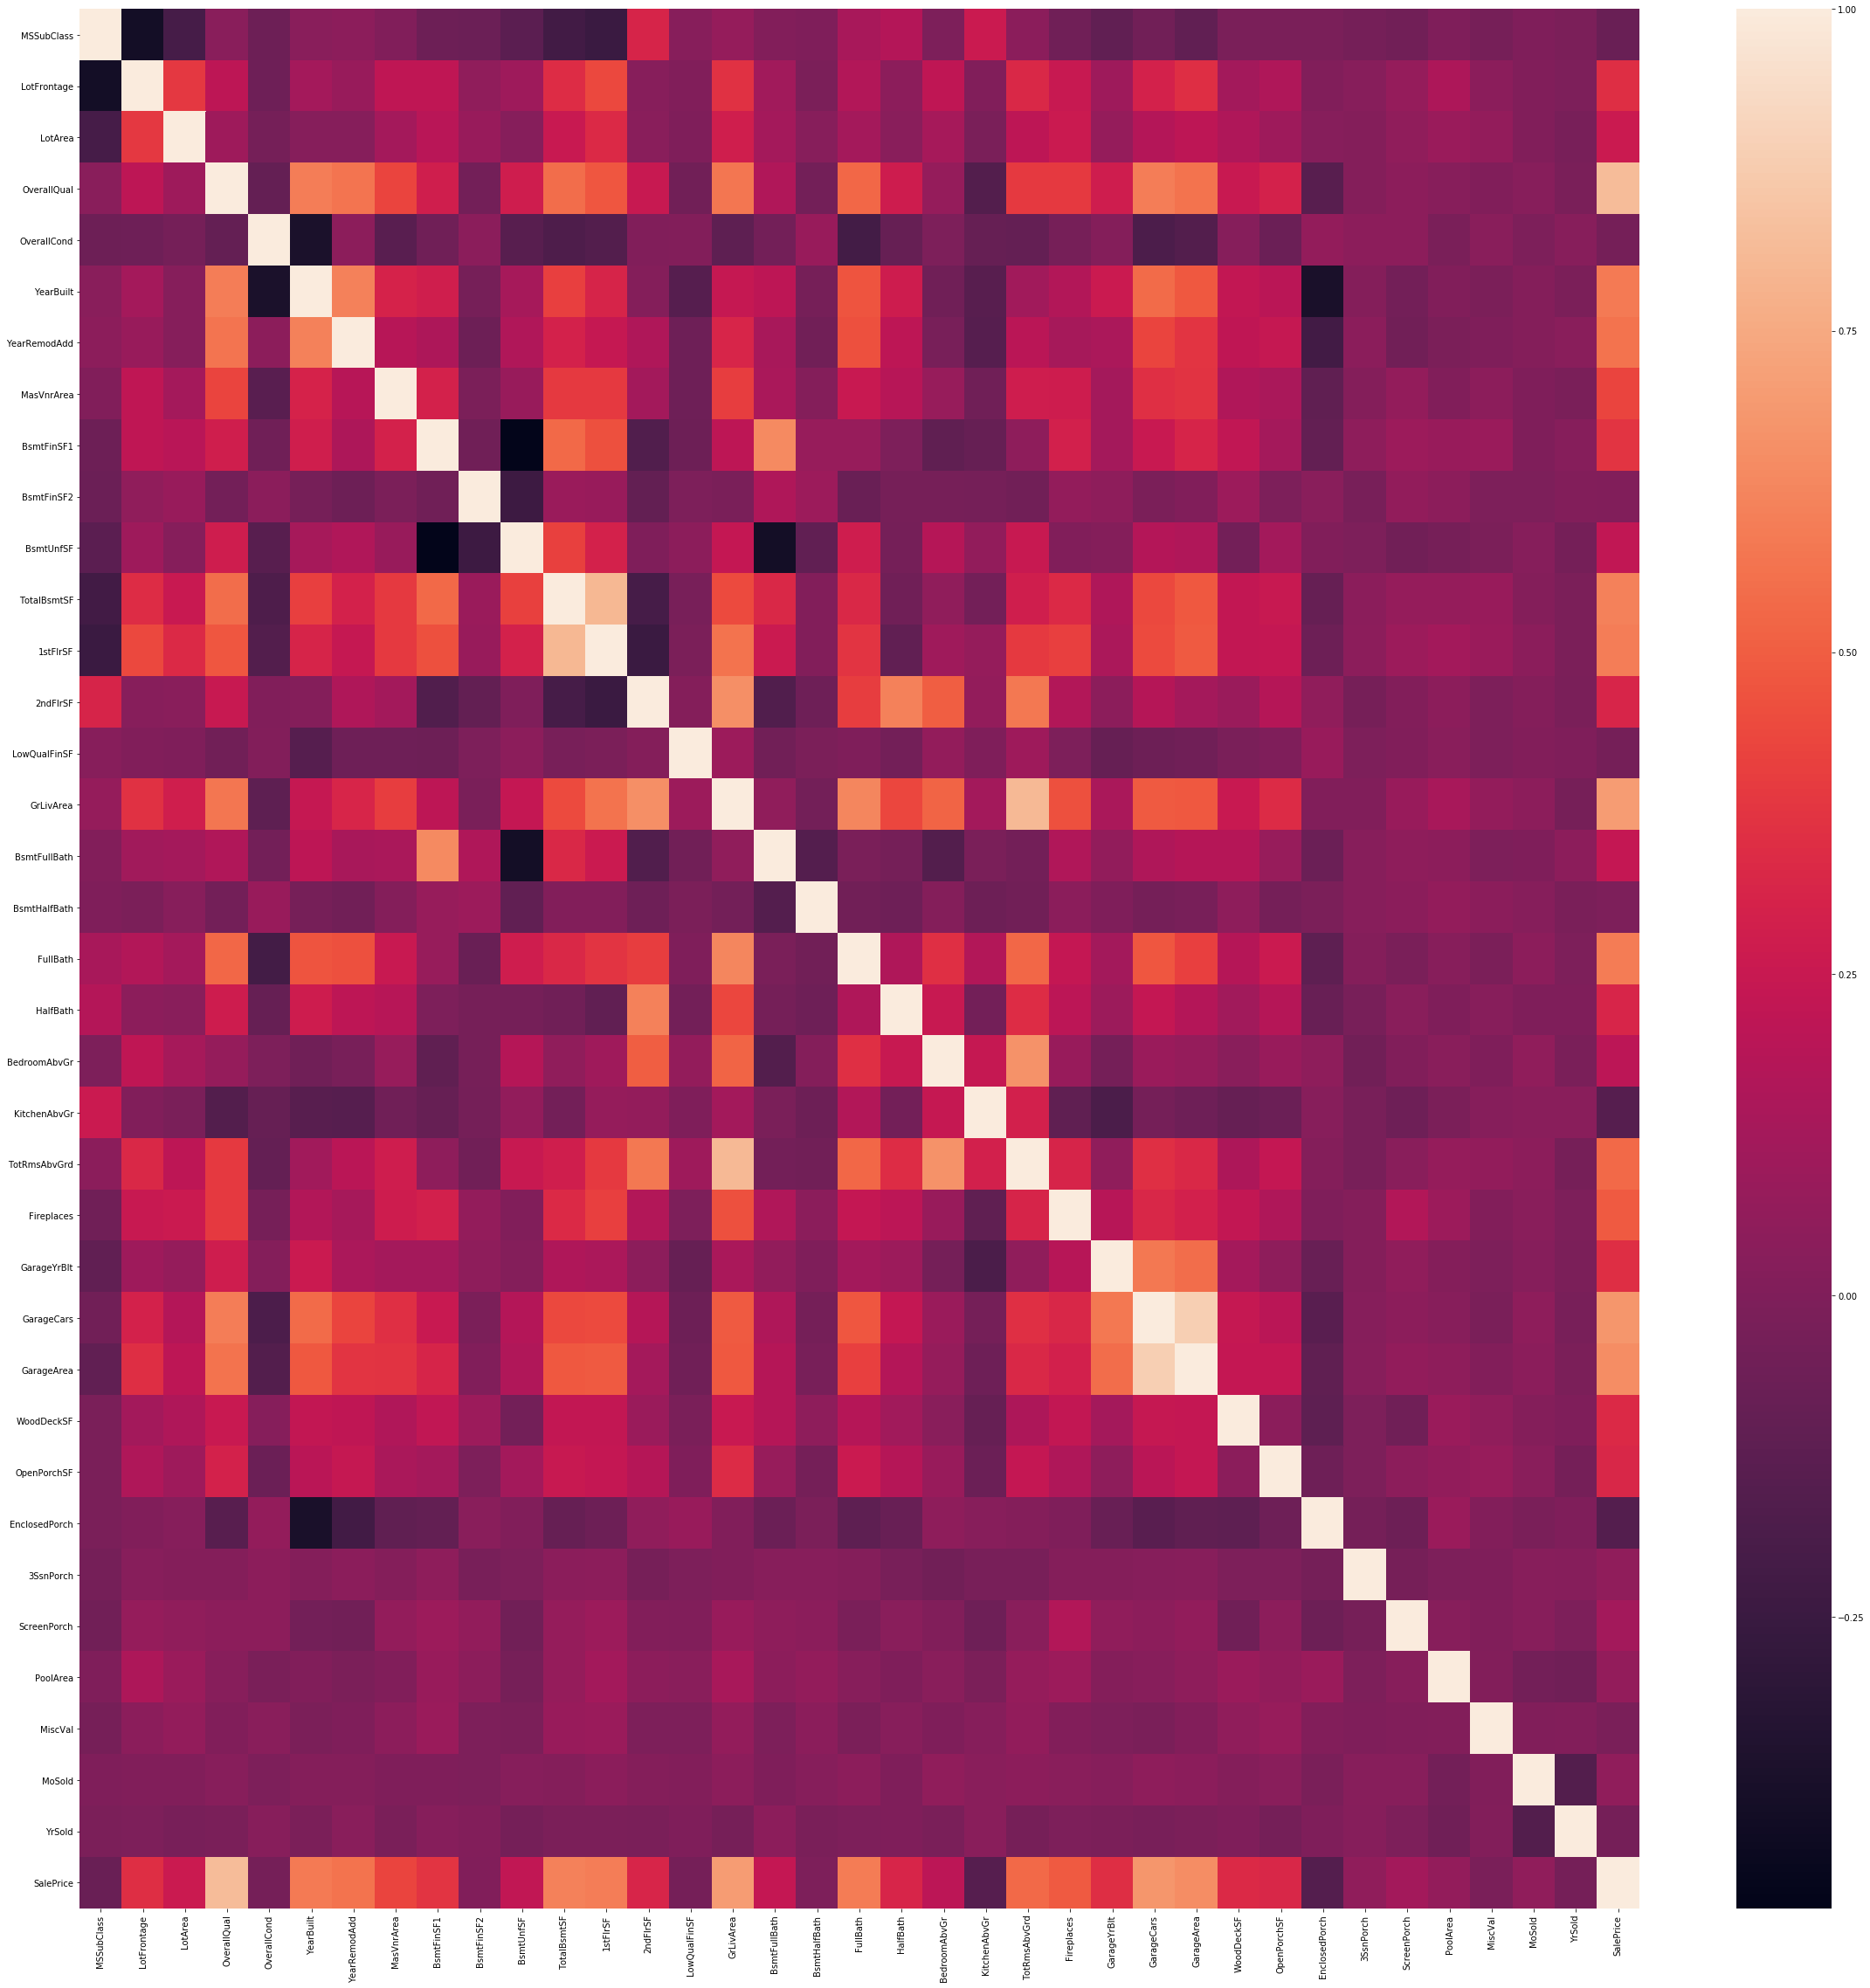

In [22]:
corr = combined_data.corr()
f, ax = plt.subplots(figsize=(40, 40))
sns.heatmap(corr)

Dropped columns with the least correlation

In [23]:
combined_data.drop(['MSSubClass', 'OverallCond', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', '2ndFlrSF', 'BsmtFullBath',
                  'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                  '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'], axis=1, inplace=True)

Plotting heatmap for columns with the most correlation

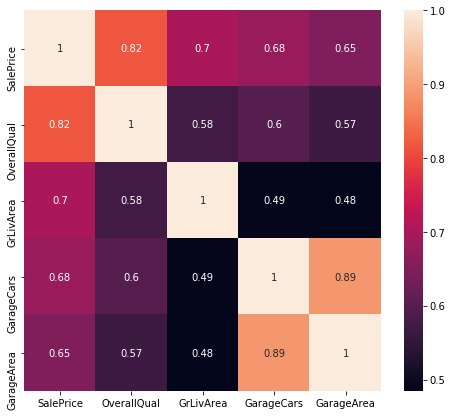

In [24]:
corr1 = combined_data[['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']].corr()
f, ax = plt.subplots(figsize=(8,7))
sns.heatmap(corr1, annot=True)

In [25]:
combined_data.shape

(2919, 55)

Distplot before taking log

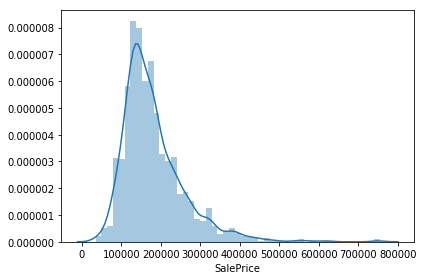

In [26]:
sns.distplot(df_train['SalePrice'])
plt.tight_layout()
plt.show()

Distplot after taking log

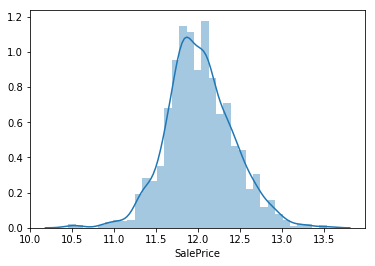

In [27]:
target = np.log(df_train['SalePrice'])
sns.distplot(target)
plt.show()

In [28]:
labels = df_train['SalePrice']

In [29]:
combined_data.drop('SalePrice', axis=1, inplace=True)

In [30]:
missing = combined_data.isnull().sum()/len(combined_data)
missing = missing[missing >0]
missing.sort_values(ascending=False, inplace=True)
missing

Series([], dtype: float64)

In [31]:
combined_data1 = pd.get_dummies(combined_data, drop_first=True)

In [32]:
combined_data1.head(5)

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  \
df_train 0         65.0     8450            7       2003          2003   
         1         80.0     9600            6       1976          1976   
         2         68.0    11250            7       2001          2002   
         3         60.0     9550            7       1915          1970   
         4         84.0    14260            8       2000          2000   

            MasVnrArea  BsmtFinSF1  TotalBsmtSF  1stFlrSF  GrLivArea  \
df_train 0       196.0       706.0        856.0       856       1710   
         1         0.0       978.0       1262.0      1262       1262   
         2       162.0       486.0        920.0       920       1786   
         3         0.0       216.0        756.0       961       1717   
         4       350.0       655.0       1145.0      1145       2198   

                    ...            SaleType_ConLI  SaleType_ConLw  \
df_train 0          ...                         0               0   
         1          ...                         0               0   
         2          ...                         0               0   
         3          ...                         0               0   
         4          ...                         0               0   

            SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  \
df_train 0             0             0            1                      0   
         1             0             0            1                      0   
         2             0             0            1                      0   
         3             0             0            1                      0   
         4             0             0            1                      0   

            SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
df_train 0                     0                     0                     1   
         1                     0                     0                     1   
         2                     0                     0                     1   
         3                     0                     0                     0   
         4                     0                     0                     1   

            SaleCondition_Partial  
df_train 0                      0  
         1                      0  
         2                      0  
         3                      0  
         4                      0  

[5 rows x 225 columns]

In [33]:
combined_data1.shape

(2919, 225)

In [34]:
train = combined_data1.loc['df_train']

In [35]:
test = combined_data1.loc['df_test']

In [36]:
X = train.loc[:, :]
y = np.log(labels)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

### GRADIENT BOOST REGRESSOR

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

In [80]:
gbm = GradientBoostingRegressor(learning_rate=0.08, n_estimators=1000,alpha=0.15, max_depth=4, min_samples_leaf=10)
gbm.fit(X_train,y_train)
predsTest = gbm.predict(X= X_test)

In [89]:
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error
def rmsle_scorer(pred, test):
    rmsle = np.sqrt(mean_squared_log_error(pred,test))
    return rmsle

In [91]:
rmsle_scorer(predsTest, y_test)

0.0109177653784399

### XGBOOST REGRESSOR

In [84]:
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()
model = XGBRegressor(n_thread=-1, colsample_bytree=1, learning_rate=0.05, n_estimators=1000, max_depth=10, min_child_weight=1, subsample=1, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.05, max_delta_step=0, max_depth=10,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
       n_thread=-1, nthread=None, objective='reg:linear', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [85]:
y_pred=model.predict(X_test)

In [92]:
rmsle_scorer(y_pred, y_test)

0.012135409947049139

## CONCLUSION

Thus, I have beaten the bot and gotten an rmsle of 0.0109 using Gradient Boost Regressor compared to an rmsle of 0.13 generated by H2O for it's best model. I chose the hyperparameters generated by H2O of the best model and after performing data cleaning and Feature Engineering on the data trained the model using these hyperparameters.

The bot failed to give an rmsle this low, because H2O can give better results if ran for a longer runtime. If H2O ran for more than 1000 secs it might be able to give better results than this.

Therefore, it's important to note that because of the arbitrary 1000 secs cut off, H2O didn't perform that well, but with enough running time the AutoML tool can pull ahead of manually computed values of RMSLE.

## CONTRIBUTIONS

Personal Contribution : 60%

External Source : 40%

## CITATIONS

1. Article title:	House Prices: Advanced Regression Techniques | Kaggle

   Website title:	Kaggle.com
   
   URL          :	https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
   
   
2. Article title:	Comprehensive data exploration with Python | Kaggle

   Website title:	Kaggle.com
   
   URL:	https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
   
   
3. Article title:	nikbearbrown/CSYE_7245

   Website title:	GitHub
   
   URL          :	https://github.com/nikbearbrown/CSYE_7245/blob/master/H2O/H2O_automl_lending_club.ipynb

## LICENSE

Copyright 2019 APURVA PRAVIN SALVI

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.